In [8]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F

# for number-crunching
import numpy as np

import copy

# for data visualization
import matplotlib.pyplot as plt

In [9]:
FFNmodel = nn.Sequential(
    nn.Linear(2,8),
    nn.Linear(8,8),
    nn.Linear(8,2)
)

In [10]:
# Create a model with Xavier weight initializer

# Random seed = None

model_base = copy.deepcopy(FFNmodel)

[nn.init.xavier_normal_(p[1].data) for p in model_base.named_parameters() if 'weight' in p[0]];

In [11]:
#  Random seed = 1

model_seed1a = copy.deepcopy(FFNmodel)

torch.manual_seed(1)

[nn.init.xavier_normal_(p[1].data) for p in model_seed1a.named_parameters() if 'weight' in p[0]];

In [13]:
#  Random seed = 2

model_seed2 = copy.deepcopy(FFNmodel)

torch.manual_seed(2)

[nn.init.xavier_normal_(p[1].data) for p in model_seed2.named_parameters() if 'weight' in p[0]];

In [14]:
#  Random seed = 1

model_seed1b = copy.deepcopy(FFNmodel)

torch.manual_seed(1)

[nn.init.xavier_normal_(p[1].data) for p in model_seed1b.named_parameters() if 'weight' in p[0]];

In [15]:
weights_base = np.array([])
weights_1a = np.array([])
weights_2 = np.array([])
weights_1b = np.array([])

for i in range(1,len(list(model_base.modules()))):
    weights_base = np.append(weights_base, model_base[i-1].weight.detach().numpy())
    weights_1a = np.append(weights_1a,model_seed1a[i-1].weight.detach().numpy())
    weights_2 = np.append(weights_2, model_seed2[i-1].weight.data.numpy())
    weights_1b = np.append(weights_1b,model_seed1b[i-1].weight.data.numpy())


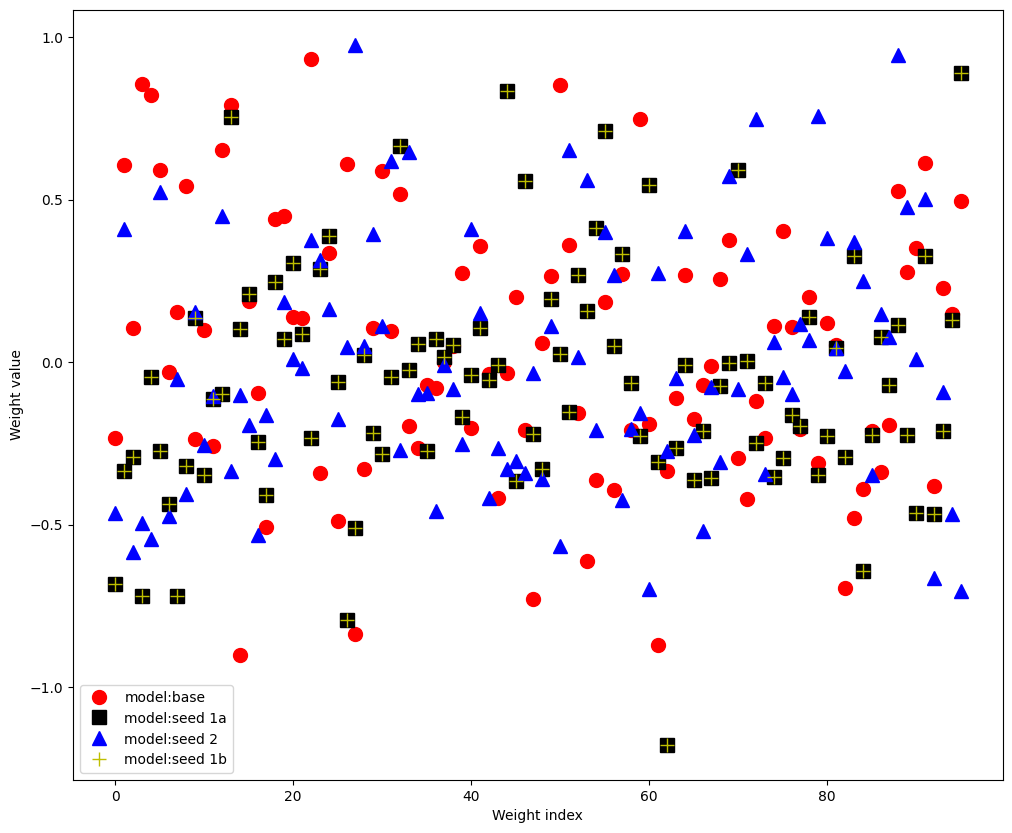

In [25]:
# Plot the results
fig = plt.figure(figsize=(12,10))
plt.plot(weights_base, 'ro', label='model:base', markersize=10)
plt.plot(weights_1a, 'ks', label='model:seed 1a', markersize=10)
plt.plot(weights_2, 'b^', label='model:seed 2', markersize=10)
plt.plot(weights_1b, 'y+', label='model:seed 1b', markersize=10)

plt.legend()
plt.xlabel('Weight index')
plt.ylabel('Weight value')

plt.show();

In [21]:
# Find the difference by vector subtraction
weights_diff = weights_2 - weights_1b
weights_diff

array([ 2.16806829e-01,  7.45431691e-01, -2.90782511e-01,  2.23520219e-01,
       -5.00258014e-01,  7.94600785e-01, -3.47126424e-02,  6.66463155e-01,
       -8.75175595e-02,  1.85594708e-02,  9.21172500e-02,  7.31030107e-03,
        5.50017133e-01, -1.09119886e+00, -2.02777542e-01, -4.02636021e-01,
       -2.86438853e-01,  2.48265430e-01, -5.47139093e-01,  1.15796767e-01,
       -2.95491513e-01, -1.04030229e-01,  6.10936463e-01,  2.78347135e-02,
       -2.25447640e-01, -1.14090409e-01,  8.39484766e-01,  1.48829174e+00,
        2.80442704e-02,  6.14067763e-01,  3.93611468e-01,  6.66235905e-01,
       -9.34904635e-01,  6.72464542e-01, -1.54209968e-01,  1.77310407e-01,
       -5.28020345e-01, -2.47541508e-02, -1.37290664e-01, -8.23887885e-02,
        4.48182333e-01,  4.83895838e-02, -3.63988109e-01, -2.53847361e-01,
       -1.16286966e+00,  6.34537041e-02, -8.97859871e-01,  1.87631380e-01,
       -3.23822200e-02, -8.11270401e-02, -5.90378746e-01,  8.08354631e-01,
       -2.53806556e-01,  